In [4]:
%pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Lecture du jeu de données
data=pd.read_excel("/Users/fezzibasma/Desktop/Data_Full-Stack/Deployment/Projet/get_around_delay_analysis.xlsx")
data.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000.0,363965.0,mobile,canceled,NaN,NaN,NaN
1,507750.0,269550.0,mobile,ended,-81.0,NaN,NaN
2,508131.0,359049.0,connect,ended,70.0,NaN,NaN
3,508865.0,299063.0,connect,canceled,NaN,NaN,NaN
4,511440.0,313932.0,mobile,ended,NaN,NaN,NaN


In [3]:
pd.read_csv("get_around_delay_analysis.csv",sep=";")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [7]:
print(data.shape)

(21310, 7)


In [8]:
data.drop_duplicates(inplace=True)
print(data.shape)

(21310, 7)


In [9]:
#Statistiques descriptives
data.describe(include="all")

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


In [10]:
print("type de voiture:")
data["checkin_type"].value_counts()

type de voiture:


mobile     17003
connect     4307
Name: checkin_type, dtype: int64

In [11]:
print("l'état de la réservation:")
data["state"].value_counts()

l'état de la réservation:


ended       18045
canceled     3265
Name: state, dtype: int64

In [12]:
#On va remplacer les valeurs manquantes par 0 
data.fillna(0,inplace=True)

In [13]:
#On va transformer le délai at the checkout in minutes, prenant 10 minutes max comme délai résonnable
# 1 comme étant en retard , 0 sinon
data['delay']=data["delay_at_checkout_in_minutes"].apply(lambda x: 1 if x>10 
                                                                    else 0)
data.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay
0,505000.0,363965.0,mobile,canceled,0.0,0.0,0.0,0
1,507750.0,269550.0,mobile,ended,-81.0,0.0,0.0,0
2,508131.0,359049.0,connect,ended,70.0,0.0,0.0,1
3,508865.0,299063.0,connect,canceled,0.0,0.0,0.0,0
4,511440.0,313932.0,mobile,ended,0.0,0.0,0.0,0


In [14]:
fig = px.pie(data, values='delay', names='state', title='Impact du retard sur la réservation, est ce que la réservation peut être annulée ou non?')
fig.show()
print("nous constatons que le retard n'est pas un motif d'annulation de la réservation.")


nous constatons que le retard n'est pas un motif d'annulation de la réservation.


## scope: should we enable the feature for all cars?, only Connect cars?

In [15]:
data_ecdf=data[data["time_delta_with_previous_rental_in_minutes"]>0.0]
data_ecdf.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,delay
6,511639.0,370585.0,connect,ended,-15.0,563782.0,570.0,0
19,519491.0,312389.0,mobile,ended,58.0,545639.0,420.0,1
34,525044.0,349751.0,mobile,ended,0.0,510607.0,60.0,0
40,528808.0,181625.0,connect,ended,-76.0,557404.0,330.0,0
64,533670.0,320824.0,connect,ended,-6.0,556563.0,630.0,0


In [16]:
fig = px.histogram(data_ecdf, x="time_delta_with_previous_rental_in_minutes", color="checkin_type",
    labels={'time_delta_with_previous_rental_in_minutes':'Délai entre deux locations de la voiture en minutes'},
    title='La fréquence de location par type de contrat :',
    color_discrete_sequence=[ "lightpink", "lightblue"])
fig.show()
print("Les propriètaires privilégient les contrats mobile entre particuliers car leur fréquence est plus importante que les contrats connect")
fig=px.histogram(data_frame=data_ecdf, x='delay_at_checkout_in_minutes', color='checkin_type', histnorm='percent', 
    barmode='overlay',range_x=(-400,400),labels={'delay_at_checkout_in_minutes':'Retard lors du check-out par minute'},
    title='Impact du retard sur le check-out en minutes :',
    color_discrete_sequence=[ "lightpink", "lightblue"])
fig.show()
print("Ce choix impacte le retard lors du check-out, car la procédure mobile va être plus lente que la procédure connect.")

Les propriètaires privilégient les contrats mobile entre particuliers car leur fréquence est plus importante que les contrats connect


Ce choix impacte le retard lors du check-out, car la procédure mobile va être plus lente que la procédure connect.


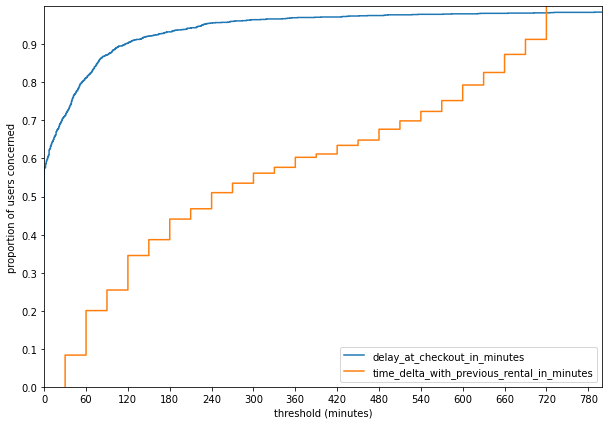

In [23]:
plt.figure(figsize=(10, 7))
plt.xlim(0, 800)
sns.ecdfplot(data_ecdf, x="delay_at_checkout_in_minutes", complementary=False, label="delay_at_checkout_in_minutes")
sns.ecdfplot(data_ecdf[data_ecdf['state'] == 'ended'], x="time_delta_with_previous_rental_in_minutes", label="time_delta_with_previous_rental_in_minutes")
plt.xlabel('threshold (minutes)')
plt.ylabel('proportion of users concerned')
plt.yticks(np.arange(0, 1, 0.1)) # Axes ranges
plt.xticks(np.arange(0, 800, 60))
plt.legend()


## threshold: how long should the minimum delay be?

In [22]:
fig = px.ecdf(data_ecdf[data_ecdf['checkin_type']=='connect'], x=["time_delta_with_previous_rental_in_minutes", "delay_at_checkout_in_minutes"],range_x=(0, 600),color_discrete_sequence=[ "blue", "violet"])                                                                                                                                                                                                                            
fig.update_xaxes(title_text='threshold (minutes)', nticks=50) 
fig.update_yaxes(title_text='proportion of users concerned') 
fig.show()
print("Nous constatons 66% de la population rendent leur voiture à temps et le seuil mininimal de retard est de 30 minutes où on arrive régler la situation." 
"Le retard de retour impacte le delai de reprise d'une manière proportionnelle et le retard s'accumule graduellement sur la journée à partir de 30 minutes"
"A partir de 40 minutes de retard, environ 20% de potentiels loueurs sont perdus par le proprietère.")

Nous constatons 66% de la population rendent leur voiture à temps et le seuil mininimal de retard est de 30 minutes où on arrive régler la situation.Le retard de retour impacte le delai de reprise d'une manière proportionnelle et le retard s'accumule graduellement sur la journée à partir de 30 minutesA partir de 40 minutes de retard, environ 20% de potentiels loueurs sont perdus par le proprietère.


In [33]:
fig = px.ecdf(data_ecdf[data_ecdf['checkin_type']=='mobile'], x=["time_delta_with_previous_rental_in_minutes", "delay_at_checkout_in_minutes"],range_x=(0, 600),color_discrete_sequence=[ "blue", "violet"])                                                                                                                                                                                                                            
fig.update_xaxes(title_text='threshold (minutes)', nticks=50) 
fig.update_yaxes(title_text='proportion of users concerned') 
fig.show()
print("Nous constatons 48% de la population rendent leur voiture à temps et le seuil mininimal de retard est de 30 minutes où on arrive régler la situation." 
"Le retard de retour impacte le delai de reprise d'une manière proportionnelle et le retard s'accumule graduellement sur la journée à partir de 30 minutes.Il serait envisageable de réduire le seuil pour minimal pour le connect")

Nous constatons 48% de la population rendent leur voiture à temps et le seuil mininimal de retard est de 30 minutes où on arrive régler la situation.Le retard de retour impacte le delai de reprise d'une manière proportionnelle et le retard s'accumule graduellement sur la journée à partir de 30 minutes
